## Preprocessing

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_excel('IDataset2.xlsx')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
#print(X)

# Encoding categorical data
# Encoding the Independent Variable
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])],
                       remainder='passthrough')
X = np.array(ct.fit_transform(X))
#print(X)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 71)

## Applying Grid Search to find the best model and the best parameters

In [2]:
from sklearn.model_selection import GridSearchCV
parameters = [{'max_depth': [8, 9, 10, 11, 12, 13, 14, 15, 16],
               'min_samples_split': [2, 3, 4],
               'min_samples_leaf': [1, 2, 3, 4]}]
grid_search = GridSearchCV(estimator = regressor,
                           param_grid = parameters,
                           scoring = 'r2',
                           cv = 5,
                           n_jobs = -1,
                           verbose = 1,
                           return_train_score=True)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy:", best_accuracy)
print("Best Parameters:", best_parameters)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Accuracy: 0.9571534102044957
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}


## Training the Decision Tree Regression model on the Training set

In [2]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_depth = 11,
                                  min_samples_split = 2,
                                  min_samples_leaf = 1,
                                  random_state = 71)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=11, random_state=71)

## Create a KFold object with 5 splits 

In [3]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
folds = KFold(n_splits = 5, shuffle = False)
scores = cross_val_score(regressor, X_train, y_train, scoring='r2', cv=folds)
print (scores)
print (scores.mean())
regressor

[0.94263138 0.97525661 0.9873244  0.92513089 0.95542377]
0.9571534102044957


DecisionTreeRegressor(max_depth=10, min_samples_leaf=2, random_state=67)

## Predicting the Test set results

In [3]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
file = np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)
print(file)

[[ 59.62  56.27]
 [268.65 275.19]
 [179.7  154.01]
 [148.77 124.13]
 [ 30.1   31.91]
 [249.25 250.9 ]
 [327.12 318.08]
 [126.15 130.63]
 [ 21.79  22.28]
 [293.56 308.69]
 [165.85 196.47]
 [ 63.66  59.91]
 [198.85 190.41]
 [181.82 190.47]
 [ 29.16  31.12]
 [ 49.47  55.82]
 [ 46.46  49.08]
 [143.07 149.83]
 [ 57.86  60.27]
 [ 28.48  26.35]
 [187.81 196.5 ]
 [377.38 342.16]
 [ 19.77  17.94]
 [ 71.84  77.99]
 [ 26.87  28.83]
 [ 78.5   74.98]
 [ 73.25  69.37]
 [170.6  163.26]
 [ 24.6   25.93]
 [ 82.29  79.01]
 [  6.63   5.86]
 [377.38 382.46]
 [ 76.48  72.  ]
 [ 96.38  78.38]
 [364.69 341.12]
 [ 72.83  67.81]
 [259.96 269.19]
 [ 45.82  57.54]
 [103.36  97.47]
 [ 47.95  46.24]
 [159.3  188.94]
 [148.77 155.25]
 [407.86 435.33]
 [256.15 245.91]
 [ 61.18  71.43]
 [ 61.05  64.68]
 [ 33.72  39.6 ]
 [ 43.37  40.54]
 [175.25 191.8 ]
 [127.79 122.11]
 [101.33 107.37]
 [179.7  158.34]
 [ 73.25  68.52]
 [ 46.37  41.68]
 [ 36.27  33.88]
 [ 76.69  70.19]
 [377.38 366.96]
 [ 49.47  53.66]
 [174.51 206.8

## Explanation

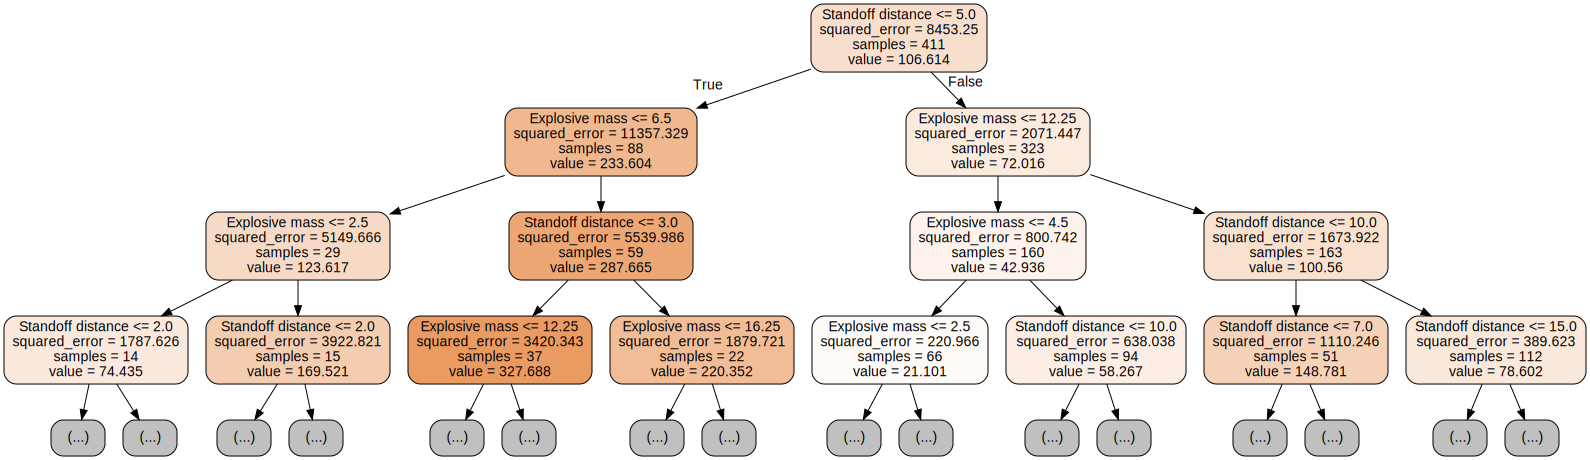

In [4]:
features = ['Explosive type-Composition B', 'Explosive type-TNT', 'Explosive mass', 'Standoff distance']
import graphviz
from sklearn.tree import export_graphviz
# DOT data
dot_data = export_graphviz(regressor,
                           max_depth = 3,
                           out_file=None,
                           feature_names=features,
                           label = 'all',
                           class_names=None,
                           rounded=True,
                           filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png")
graph.render("decision_tree_graphivz")
graph

In [8]:
import graphviz
from sklearn.tree import export_graphviz
# DOT data
dot_data = export_graphviz(regressor,
                           out_file=None,
                           feature_names=features,
                           label = 'all',
                           class_names=None,
                           rounded=True,
                           filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png")
graph.render("decision_tree_graphivz_full")

'decision_tree_graphivz_full.png'

## Feature importance

In [9]:
# get importance
importance = regressor.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.00045
Feature: 1, Score: 0.00271
Feature: 2, Score: 0.30339
Feature: 3, Score: 0.69346


In [10]:
from sklearn.inspection import permutation_importance
# perform permutation importance
results = permutation_importance(regressor, X_train, y_train, scoring='neg_mean_squared_error')
# get importance
importance = results.importances_mean
# summarize feature importance
for j,k in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (j,k))

Feature: 0, Score: 10.46683
Feature: 1, Score: 70.57974
Feature: 2, Score: 5822.43990
Feature: 3, Score: 12628.51790
